<a href="https://colab.research.google.com/github/Balla01/Transliterated_language/blob/main/FINAL_LANG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/language_text4.csv")

In [ ]:
df

,index,language,lable
0,1,leather hi this,hindi
1,2,you should stop,english
2,3,janavari jun,telugu
3,4,rajkottil melnilaik kalvi,tamil
4,5,dheani enna sthalattekkuriccariyan,malayalam
...,...,...,...
27095,27096,tilidilla endu anisuttade.,kannada
27096,27097,sath he dum,hindi
27097,27098,alone i quietly,english
27098,27099,"kuda naku teliyadu,",telugu


In [ ]:
#identifing total and unique words in each language

In [ ]:
var1=0
lis=[]
lis1=[]
for i in range(27099):
  if df['lable'][i]=='kannada':
    var1+=1
    a=df['language'][i]
    a=list(a.split())
    for j in a:
      lis1.append(j)
      if j not in lis:
        lis.append(j) 


In [ ]:
print('no.of sentences: ',var1)
print('no.of unique words: ',len(lis))
print('total no.of words: ',len(lis1))

no.of sentences:  4516
no.of unique words:  4965
total no.of words:  13547


In [ ]:
lis

In [ ]:
x = df['language'].values
y = df['lable'].values


In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(x_train_vect,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = clf2.predict(x_test_vect)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)

0.7738745387453875

In [ ]:
#random forest 2

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=1500, random_state=0)
clf.fit(x_train_vect,y_train)

ExtraTreesClassifier(n_estimators=1500, random_state=0)

In [ ]:
y_pred = clf.predict(x_test_vect)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)

0.7850922509225092

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

     english       0.97      0.49      0.65      2275
       hindi       0.69      0.93      0.79       782
     kannada       0.85      0.98      0.91       977
   malayalam       0.73      0.89      0.80       939
       tamil       0.68      0.95      0.79       833
      telugu       0.79      0.93      0.86       969

    accuracy                           0.79      6775
   macro avg       0.78      0.86      0.80      6775
weighted avg       0.83      0.79      0.77      6775



In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[1107   29    2    1    0    0]
 [ 307  725    1    5    2   18]
 [ 129    4  957   11    2   19]
 [ 254    5    5  832   28   19]
 [ 291    6    3   70  793    8]
 [ 187   13    9   20    8  905]]


In [ ]:
import matplotlib.pyplot as plt

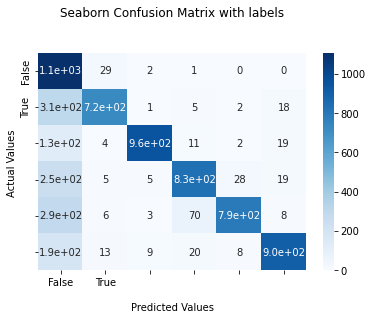

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn
import pandas as pd
import scipy as scp
from collections import Counter
import matplotlib

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
model.fit(x_train_vect,y_train)

In [ ]:
y_pred = model.predict(x_test_vect)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)